In [36]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd

pi * 3 = 9.42477796076938


In [37]:
# project 5 OR 
all_sheets = pd.read_excel("PaintShop_September_2024.xlsx", sheet_name=None)
print("Beschikbare sheets in het bestand:", list(all_sheets.keys()))
Orders = all_sheets['Orders']
Machines = all_sheets['Machines']
Setups = all_sheets['Setups'] 
# Bij mij staat er hier een error maar de rest van de berekeningen doen het wel allemaal nog 

Beschikbare sheets in het bestand: ['Orders', 'Machines', 'Setups']


In [38]:
# project 5 OR 
all_sheets = pd.read_excel("PaintShop-September2024.xlsx", sheet_name=None)
print("Beschikbare sheets in het bestand:", list(all_sheets.keys()))
Orders = all_sheets['Orders']
Machines = all_sheets['Machines']
Setups = all_sheets['Setups'] 

FileNotFoundError: [Errno 2] No such file or directory: 'PaintShop-September2024.xlsx'

In [22]:
Orders = Orders.rename(columns={'Order': 'Order(O)'})
Orders = Orders.rename(columns={'Surface': 'Surface(s_o)'})
Orders = Orders.rename(columns={'Colour': 'Colour(Colour_o)'})
Orders = Orders.rename(columns={'Deadline': 'Deadline(d_o)'})
Orders = Orders.rename(columns={'Penalty': 'Penalty(c_o)'})
43-7

Orders.head()

,Order(O),Surface(s_o),Colour(Colour_o),Deadline(d_o),Penalty(c_o)
0,O1,150,Green,18,10
1,O2,200,Yellow,28,12
2,O3,180,Blue,12,8
3,O4,170,Blue,15,15
4,O5,130,Yellow,36,9


In [15]:
# S_o/V_m = P_o_m
Machines = Machines.rename(columns={'Machine': 'Machine(M)'})
Machines = Machines.rename(columns={'Speed': 'Speed(V_m)'})
Machines.head()

,Machine(M),Speed(V_m)
0,M1,20
1,M2,25
2,M3,18


In [16]:
# P_o_m = processing time van de order o op mashine m
# S_o/V_m = P_o_m
# Berekeningen
M1 = Orders['Surface(s_o)'] / 20
M2 = Orders['Surface(s_o)'] / 25
M3 = Orders['Surface(s_o)'] / 18

# Zet de resultaten in een nieuwe DataFrame
P_o_m = pd.DataFrame({
    'M1': M1,
    'M2': M2,
    'M3': M3
})

# Print het resultaat
P_o_m

,M1,M2,M3
0,7.5,6.0,8.333333
1,10.0,8.0,11.111111
2,9.0,7.2,10.000000
3,8.5,6.8,9.444444
4,6.5,5.2,7.222222
5,8.0,6.4,8.888889
6,7.0,5.6,7.777778
7,10.5,8.4,11.666667
8,9.5,7.6,10.555556
9,6.0,4.8,6.666667


In [17]:
Setups = Setups.rename(columns={'Setup time': 'Setup_time(t_h1_h2)'})
Setups = Setups.rename(columns={'From colour': 'From colour(h1)'})
Setups = Setups.rename(columns={'To colour': 'To colour(h2)'})

In [18]:
Setups

,From colour(h1),To colour(h2),Setup_time(t_h1_h2)
0,Green,Red,6
1,Yellow,Green,2
2,Green,Yellow,5
3,Yellow,Red,1
4,Red,Yellow,8
5,Red,Green,5
6,Blue,Red,8
7,Blue,Yellow,10
8,Blue,Green,4
9,Green,Blue,3


In [19]:
# decision variables 
# machine_o = machine on wich order o is execuled.
# seqno_o = sequence number of order o on maschine_o
# sequence_m = order in which orders o that are assigned to m are executed

In [20]:
# decision variables 
# machine_o = machine on wich order o is execuled.
# seqno_o = sequence number of order o on maschine_o
# sequence_m = order in which orders o that are assigned to m are executed

# parameters:
# P_o_m = processing time van de order o op mashine m
# t_h1_h2 = set up time from h1 to h2
# e_pred_o = de tijd waarop het vorrige proces stopte (deze weet je mas als het model aan de gang is)
# d_o = deadline for order o
# derived variables:

# pred_o = predecessor of order o on machine_o
# pred_o = ---                           if sequno_o = 1
# pred_o = sequence(machine_o,seqno_o-1) if sequno_o > 1

# b_o = start time order o
# b_o = 0                                if sequno_o = 1
# b_o = e_pred_o + t_h1_h2               if sequno_o > 1

# e_o = end time order o
# e_o = b_o + P_o_m

# l_o = lateness order o
# l_o = max{o, e_o-d_o}
# d_o = deadline for oder o

In [ ]:
# schedual cost
# min sum(C_o*l_o, o) (sum(pentalty cost for order o in O * latness order)

In [ ]:
# Zet setup tijden in een dictionary
setup_times = {}
for index, row in Setups.iterrows():
    setup_times[(row['From_colour(h1)'], row['To_colour(h2)'])] = row['Setup_time(t_h1_h2)']

# Voorbeeld initialisatie van beslissingsvariabelen
machine_o = {}
seqno_o = {}
sequence_m = {m: [] for m in Machines['Machine(M)']}

# Voorbeeld data (je zou deze moeten vervangen door je eigen logica)
# OPLOSMETODE 1 --> CONSTRUCIEVE METHODE (te doen)
# OPLOSMETHODE 2 --> FIRST/BEST IMPROVEMENT (lastiger)
# OPLOSMETHODE 3 --> METAHEURISTIEK (Ik ga in een hoekje huilen)


# Functie om de vorige order in de volgorde te krijgen
def get_predecessor(o, seqno_o, machine_o, sequence_m):
    """Geef de vorige order terug, afhankelijk van de volgorde"""
    if seqno_o[o] == 1:
        return None
    else:
        # Haal de vorige order op in de sequencelijst voor de machine van de huidige order
        prev_order = sequence_m[machine_o[o]][seqno_o[o] - 2]
        return prev_order

# Functie om de starttijd van een order te berekenen
def get_start_time(o, seqno_o, machine_o, Orders, setup_times, P_o_m):
    """Bereken de starttijd van order o"""
    if seqno_o[o] == 1:
        return 0
    else:
        pred_order = get_predecessor(o, seqno_o, machine_o, sequence_m)
        pred_end_time = end_time(pred_order, seqno_o, machine_o, Orders, setup_times, P_o_m)
        
        # Haal de kleurinformatie op van de vorige en huidige order
        pred_colour = Orders.loc[Orders['Order(O)'] == pred_order, 'Colour(Colour_o)'].values[0]
        curr_colour = Orders.loc[Orders['Order(O)'] == o, 'Colour(Colour_o)'].values[0]
        
        # Haal de setup-tijd op, standaard is 0
        setup_time = setup_times.get((pred_colour, curr_colour), 0)
        return pred_end_time + setup_time

# Functie om de eindtijd van een order te berekenen
def end_time(o, seqno_o, machine_o, Orders, setup_times, P_o_m):
    """Bereken de eindtijd van order o"""
    start_time = get_start_time(o, seqno_o, machine_o, Orders, setup_times, P_o_m)
    
    # Bepaal op welke machine de order zit
    machine_column = f'M{machine_o[o]}'
    
    # Controleer of de machinekolom in de DataFrame bestaat
    if machine_column not in P_o_m.columns:
        raise KeyError(f"Machine column '{machine_column}' not found in P_o_m DataFrame. Available columns: {P_o_m.columns}")
    
    # Haal de verwerkingstijd op voor deze order en machine
    processing_time = P_o_m.loc[P_o_m['Order(O)'] == o, machine_column].values[0]
    return start_time + processing_time

# Functie om de 'lateness' (te laat zijn) te berekenen
def lateness(o, seqno_o, machine_o, Orders, setup_times, P_o_m):
    """Bereken hoeveel te laat een order is"""
    e_o = end_time(o, seqno_o, machine_o, Orders, setup_times, P_o_m)
    deadline = Orders.loc[Orders['Order(O)'] == o, 'Deadline(d_o)'].values[0]
    return max(0, e_o - deadline)

# Voorbeeld gebruik met error handling
for o in Orders['Order(O)']:
    try:
        print(f"Order {o}:")
        print(f"  Start time: {get_start_time(o, seqno_o, machine_o, Orders, setup_times, P_o_m)}")
        print(f"  End time: {end_time(o, seqno_o, machine_o, Orders, setup_times, P_o_m)}")
        print(f"  Lateness: {lateness(o, seqno_o, machine_o, Orders, setup_times, P_o_m)}")
    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"Error: {e}")


In [27]:
import pandas as pd

# Zet setup tijden in een dictionary
setup_times = {}
for index, row in Setups.iterrows():
    setup_times[(row['From_colour(h1)'], row['To_colour(h2)'])] = row['Setup_time(t_h1_h2)']

# Voorbeeld initialisatie van beslissingsvariabelen
machine_o = {}
seqno_o = {}
sequence_m = {m: [] for m in Machines['Machine(M)']}

# Voorbeeld data (je zou deze moeten vervangen door je eigen logica)
for index, order in Orders.iterrows():
    o = order['Order(O)']
    # Voorbeeld toewijzing, je moet je eigen logica hier toepassen
    machine_o[o] = Machines['Machine(M)'][index % len(Machines)]
    seqno_o[o] = len(sequence_m[machine_o[o]]) + 1
    sequence_m[machine_o[o]].append(o)
    

# Functies om afgeleide variabelen te berekenen
def get_predecessor(o):
    if seqno_o[o] == 1:
        return None
    else:
        prev_order = sequence_m[machine_o[o]][seqno_o[o] - 2]
        return prev_order

def get_start_time(o):
    if seqno_o[o] == 1:
        return 0
    else:
        pred_order = get_predecessor(o)
        pred_end_time = end_time(pred_order)
        setup_time = setup_times.get((Orders.loc[Orders['Order(O)'] == pred_order, 'Colour(Colour_o)'].values[0],
                                      Orders.loc[Orders['Order(O)'] == o, 'Colour(Colour_o)'].values[0]), 0)
        return pred_end_time + setup_time

def end_time(o):
    start_time = get_start_time(o)
    machine_column = f'M{machine_o[o]}'
    # Debugging: Print beschikbare kolommen en machine_column
    print(f"Machine column requested: {machine_column}")
    print(f"Available columns in P_o_m: {P_o_m.columns}")
    if machine_column not in P_o_m.columns:
        raise KeyError(f"Machine column '{machine_column}' not found in P_o_m DataFrame. Available columns: {P_o_m.columns}")
    processing_time = P_o_m.loc[P_o_m['Order(O)'] == o, machine_column].values[0]
    return start_time + processing_time

def lateness(o):
    e_o = end_time(o)
    return max(0, e_o - Orders.loc[Orders['Order(O)'] == o, 'Deadline(d_o)'].values[0])

# Voorbeeld gebruik
for o in Orders['Order(O)']:
    try:
        print(f"Order {o}:")
        print(f"  Start time: {get_start_time(o)}")
        print(f"  End time: {end_time(o)}")
        print(f"  Lateness: {lateness(o)}")
    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"Error: {e}")



Order O1:
  Start time: 0
Machine column requested: MM1
Available columns in P_o_m: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')
KeyError: "Machine column 'MM1' not found in P_o_m DataFrame. Available columns: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')"
Order O2:
  Start time: 0
Machine column requested: MM2
Available columns in P_o_m: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')
KeyError: "Machine column 'MM2' not found in P_o_m DataFrame. Available columns: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')"
Order O3:
  Start time: 0
Machine column requested: MM3
Available columns in P_o_m: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')
KeyError: "Machine column 'MM3' not found in P_o_m DataFrame. Available columns: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')"
Order O4:
Machine column requested: MM1
Available columns in P_o_m: Index(['Order(O)', 'M1', 'M2', 'M3'], dtype='object')
KeyError: "Machine column 'MM1' not found in P_o_m DataF

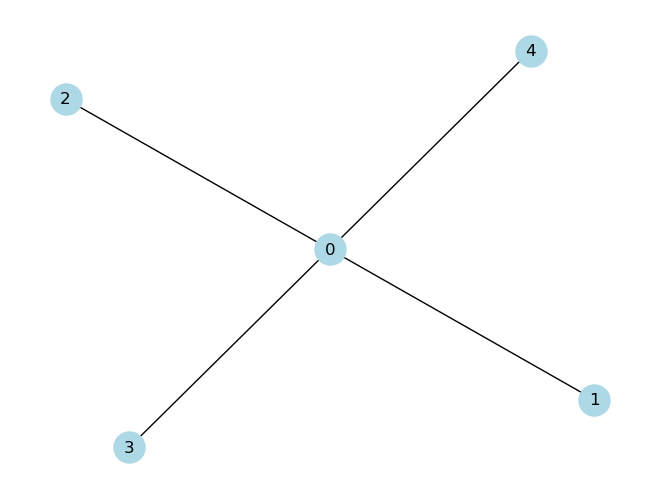

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from typing import List, Dict

def create_star_graph(n0: int) -> nx.Graph:
    """
    Creëert een star graph met n0 knopen, waarbij één centrale hub is verbonden met de andere knopen.
    
    Parameters:
    n0 (int): Aantal knopen in het star graph
    
    Returns:
    nx.Graph: Een netwerkx Graph object van het star graph
    """
    G = nx.Graph()
    G.add_node(0)  # Start met de centrale knoop
    for i in range(1, n0):
        G.add_edge(0, i)  # Verbind elke nieuwe knoop met de centrale knoop
    return G

# Visualiseer de star graph
star_graph = create_star_graph(5)
nx.draw(star_graph, with_labels=True, node_color='lightblue', node_size=500)
plt.show()


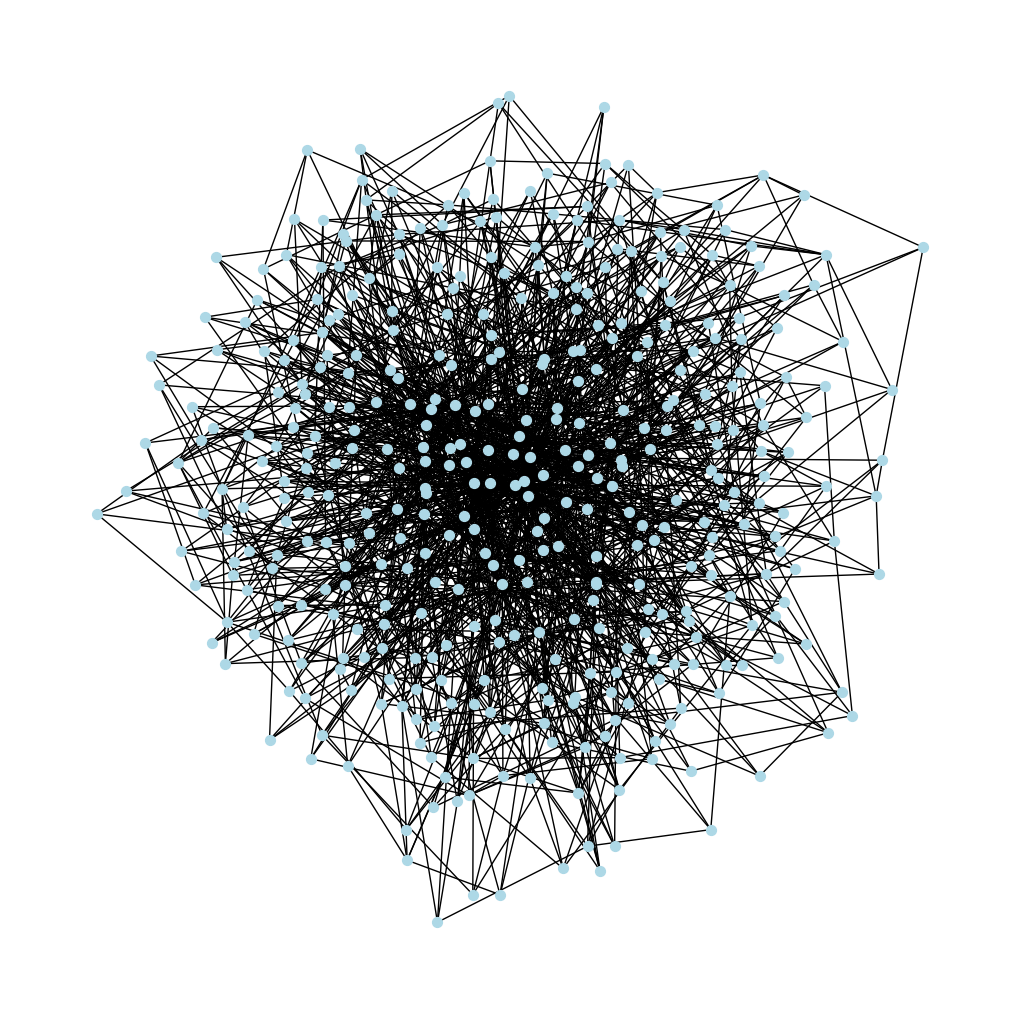

In [3]:
def preferential_attachment(G: nx.Graph, N: int, M: int) -> None:
    """
    Voegt nieuwe knopen toe aan een bestaand netwerk met preferentiële aanhechting.
    
    Parameters:
    G (nx.Graph): Het bestaande netwerk
    N (int): Totaal aantal knopen in het uiteindelijke netwerk
    M (int): Aantal verbindingen voor elke nieuwe knoop
    """
    while len(G.nodes()) < N:
        new_node = len(G.nodes())  # De nieuwe knoop is de volgende in de rij
        degrees = [G.degree(node) for node in G.nodes()]
        total_degree = sum(degrees)
        targets = set()
        
        # Preferential attachment: knopen worden geselecteerd met een kans evenredig aan hun degree
        while len(targets) < M:
            potential_target = random.choices(
                population=list(G.nodes()),
                weights=degrees,
                k=1
            )[0]
            targets.add(potential_target)
        
        for target in targets:
            G.add_edge(new_node, target)

# Breid het star graph uit tot een netwerk met 400 knopen en 4 verbindingen per nieuwe knoop
preferential_attachment(star_graph, 400, 4)

# Visualiseer het uitgebreide netwerk
plt.figure(figsize=(10, 10))
nx.draw(star_graph, with_labels=False, node_color='lightblue', node_size=50)
plt.show()


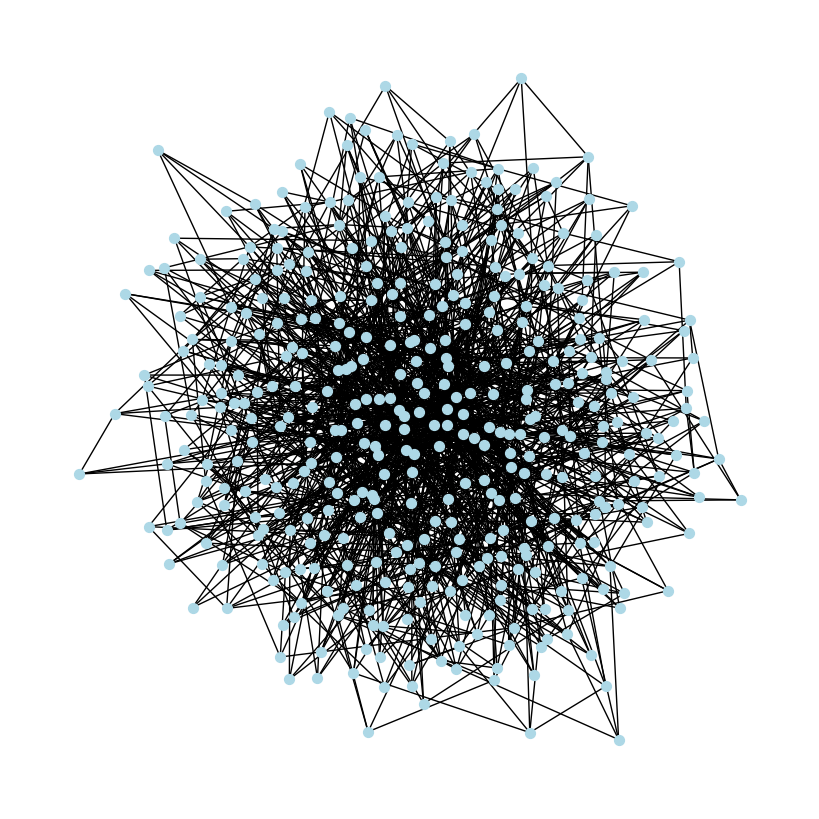

In [10]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def create_barabasi_albert_graph(n0: int, N: int, M: int) -> nx.Graph:
    """
    Creëert een Barabási-Albert netwerk met een start star graph en voegt knopen toe via preferentiële aanhechting.
    
    Parameters:
    n0 (int): Aantal startknooppunten in het star graph
    N (int): Totaal aantal knopen in het netwerk
    M (int): Aantal verbindingen voor elke nieuwe knoop
    
    Returns:
    nx.Graph: Een gegenereerd Barabási-Albert netwerk
    """
    G = nx.star_graph(n0 - 1)  # Maak star graph met n0 knopen
    while len(G.nodes()) < N:
        new_node = len(G.nodes())
        targets = random.choices(list(G.nodes()), weights=[G.degree(node) for node in G.nodes()], k=M)
        G.add_edges_from((new_node, target) for target in targets)
    return G

# Genereer een netwerk met 100 knopen, start met n0=5 en voeg M=4 verbindingen per nieuwe knoop toe
G = create_barabasi_albert_graph(5, 400, 4)

# Visualiseer het netwerk
plt.figure(figsize=(8, 8))
nx.draw(G, node_color='lightblue', node_size=50, with_labels=False)
plt.show()


In [13]:
import numpy as np

def simulate_pagerank(G: nx.Graph, start_page: int, alpha: float, T: int) -> Dict[int, float]:
    """
    Simuleert surfgedrag en berekent de PageRank door een random walk over het netwerk.
    
    Parameters:
    G (nx.Graph): Het netwerk
    start_page (int): De beginpagina
    alpha (float): De kans om naar een gelinkte pagina te gaan
    T (int): Het aantal stappen
    
    Returns:
    Dict[int, float]: De PageRank-waarden per knoop
    """
    visits = np.zeros(len(G.nodes()))
    current_page = start_page
    
    for _ in range(T):
        if random.random() < alpha and list(G.neighbors(current_page)):
            current_page = random.choice(list(G.neighbors(current_page)))
        else:
            current_page = random.choice(list(G.nodes()))
        visits[current_page] += 1
    
    # Normeer de bezoeken tot PageRank-waarden
    pagerank = visits / T
    return {i: rank for i, rank in enumerate(pagerank)}

# Bereken PageRank voor het netwerk
pagerank = simulate_pagerank(G, start_page=3, alpha=0.95, T=100)